## ALGERIAN FOREST - EDA ANALYSYIS

#### By Ajith khan

In [1]:
#Import the basic packages 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the dataset
df = pd.read_csv('/Users/ajithsmacbookair/Downloads/Data Science /Datasets/Algerian fire/Algerian_forest_fires_dataset_UPDATE.csv', header=1)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [3]:
df1 = df.drop([122, 123], axis =0)
df1.loc[:122,"Region"]=0
df1.loc[122:,"Region"]=1        #Lets make a copy of the dataset and remove the rows on 122 and 123 indices
df1

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


**Shape of the data**

In [4]:
df1.shape

(244, 15)

**Summary of the data**

**Check the datatyes in the data**

In [5]:
df1.dtypes

day             object
month           object
year            object
Temperature     object
 RH             object
 Ws             object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes         object
Region         float64
dtype: object

**Looks like all integers data are in object format**
**Lets try to change the datatypes**

**Attribute Information:**

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) 
Weather data observations 
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42 
3. RH : Relative Humidity in %: 21 to 90 
4. Ws :Wind speed in km/h: 6 to 29 
5. Rain: total day in mm: 0 to 16.8 
FWI Components 
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 
8. Drought Code (DC) index from the FWI system: 7 to 220.4 
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68 
11. Fire Weather Index (FWI) Index: 0 to 31.1 
12. Classes: two classes, namely Fire and not Fire

In [6]:
df1.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [7]:
df1.dropna(inplace=True)   #Dropping the Nulls

In [8]:
df1.columns=df1.columns.str.strip()
df1.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [9]:
df1[['day', 'month', 'year', 'Temperature', 'RH', 'Ws',"Region"]]=df1[['day', 'month', 'year', 'Temperature', 'RH', 'Ws',"Region"]].astype(int)
df1[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df1[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype('float')

In [10]:
df1.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int64
dtype: object

**Now the dataset is converted to their respected formats**

In [11]:
df1.drop('year', axis=1, inplace=True)  #Because year is same for all data

In [12]:
df1['Classes'] = df1['Classes'].str.strip()
df1.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [13]:
# proportion of count data on categorical columns
for col in df1.columns:
    print(df1[col].value_counts())
    print('---------------------------')

1     8
17    8
30    8
29    8
28    8
27    8
26    8
25    8
24    8
23    8
22    8
21    8
20    8
19    8
18    8
16    8
2     8
15    8
13    8
12    8
11    8
10    8
9     8
8     8
7     8
6     8
5     8
4     8
3     8
14    7
31    4
Name: day, dtype: int64
---------------------------
8    62
7    61
6    60
9    60
Name: month, dtype: int64
---------------------------
35    29
31    25
34    24
33    23
30    22
32    21
36    21
29    18
28    15
27     8
37     8
25     6
39     6
26     5
24     3
38     3
40     3
22     2
42     1
Name: Temperature, dtype: int64
---------------------------
64    10
55    10
58     8
54     8
78     8
      ..
21     1
90     1
24     1
38     1
26     1
Name: RH, Length: 62, dtype: int64
---------------------------
14    43
15    40
13    30
17    28
16    27
18    25
19    15
21     8
11     7
12     7
10     3
9      2
20     2
22     2
26     1
8      1
6      1
29     1
Name: Ws, dtype: int64
---------------------------
0.0     

## EXPLORING DATASET

In [14]:
cat_col = [fea for fea in df1.columns if df1[fea].dtypes == 'O']
num_col = [fea for fea in df1.columns if df1[fea].dtypes != 'O']

#Print the column
print('We have {} numeric columns : {}'.format(len(num_col), num_col))
print('\nWe have {} categorical columns : {}'.format(len(cat_col), cat_col))

We have 13 numeric columns : ['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region']

We have 1 categorical columns : ['Classes']


## UNIVARIANCE ANALYSIS

### Numeric Analysis

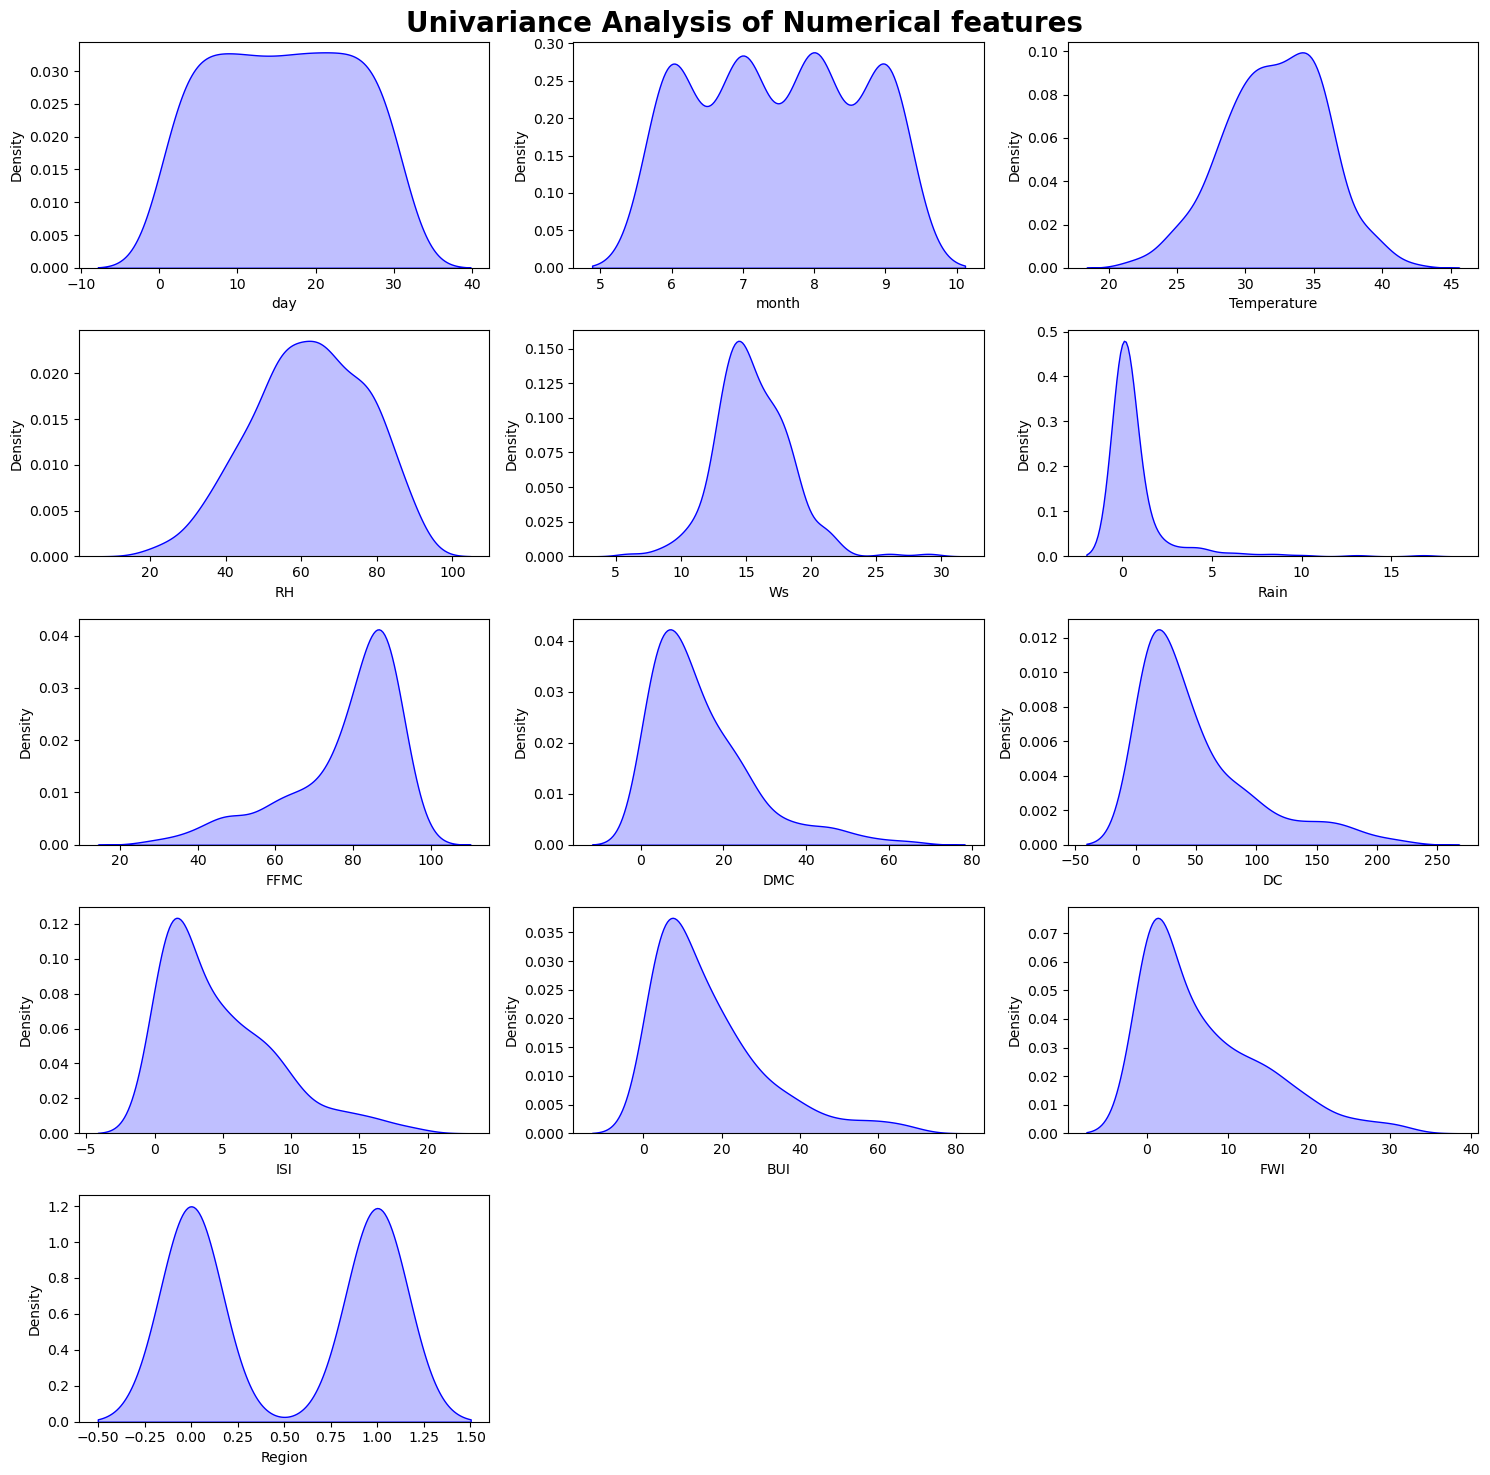

In [15]:
plt.figure(figsize = (15, 15))
plt.suptitle('Univariance Analysis of Numerical features', fontsize = 20, fontweight = 'bold')
for i in range(0,len(num_col)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df1[num_col[i]], shade=True, color = 'b')
    plt.xlabel(num_col[i])
    plt.tight_layout()

**Reports**
* The maxmimum temperature is around 35
* The maximum relative humidity is around 65
* Rain, DMC, DC, ISI, BUI and FWI are right skewed
* FFMC is left skewed

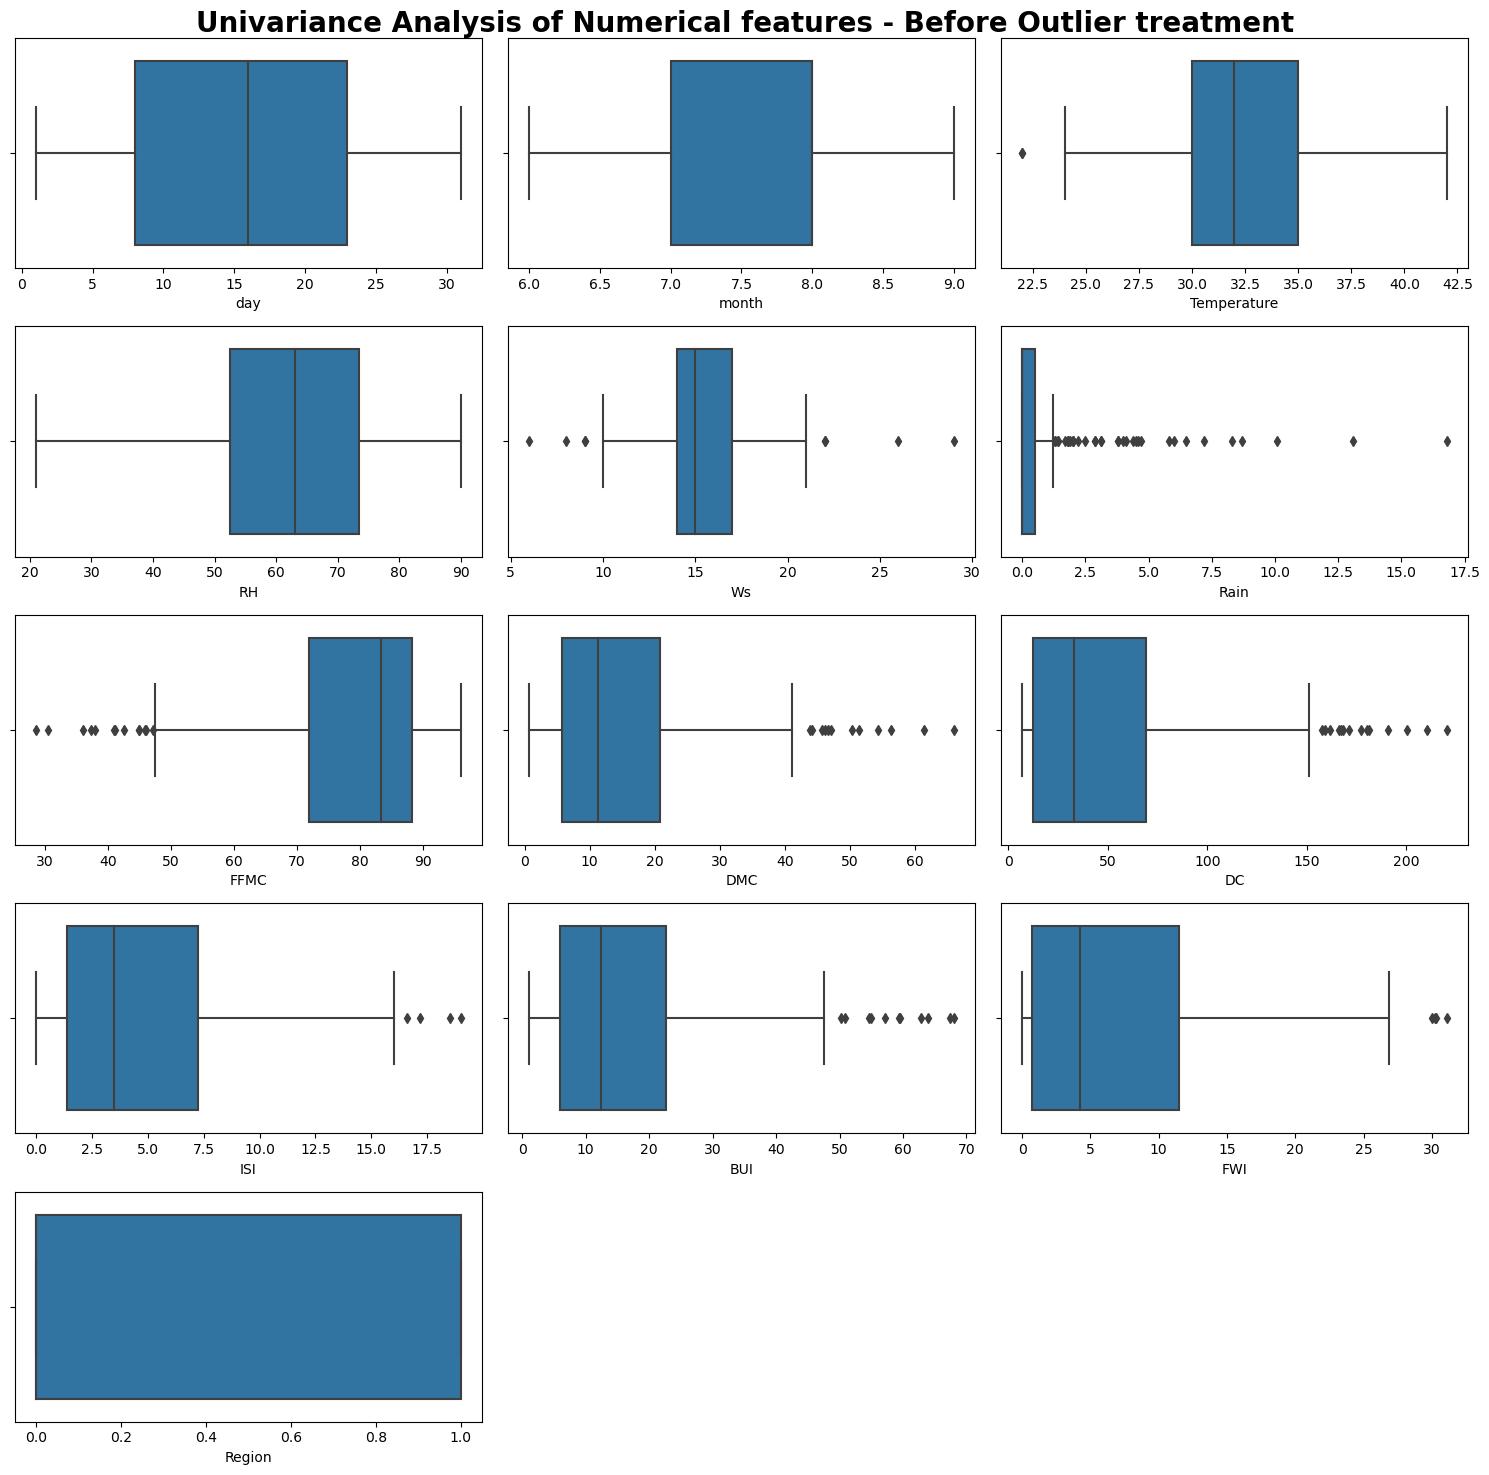

In [16]:
plt.figure(figsize = (15, 15))
plt.suptitle('Univariance Analysis of Numerical features - Before Outlier treatment', fontsize = 20, fontweight = 'bold')
for i in range(0,len(num_col)):
    plt.subplot(5,3,i+1)
    sns.boxplot(x=df1[num_col[i]])
    plt.xlabel(num_col[i])
    plt.tight_layout()

**Reports**
* There are outliers in Temperature, Ws, Rain, FFMC, DMC, DC, ISI, BUI, and FWI columns

In [ ]:
col = ['Temperature', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
for i in col:
    print(df1.groupby(df1['Classes'])[i].mean())
    print('---------------')

**Result**
* The average rainfall needed for not fire is 1.6mm
* The avearge wind speed is same in both the cases
* The average  Duff Moisture Code for fire is 21 and for non-fire is 6.4
* The average  Initial Spread Index for fire is 7.4 and for non-fire is 1.2
* The average  Buildup Index   for fire is 24 and for non-fire is 7.2
* The average  Fire Weather Index for fire is 11.73 and for non-fire is 0.96

In [41]:
df1.groupby(df1['Classes'])['month'].value_counts()

Classes   month
fire      8        51
          7        38
          6        25
          9        23
not fire  9        37
          6        35
          7        23
          8        11
Name: month, dtype: int64

**Result**
* The aximum fire happens in August month(51 times) after July month(38 times)

In [44]:
for i in col:
    print(df1.groupby(df1['month'])[i].mean())
    print('---------------')

month
6    30.800000
7    32.983607
8    35.338710
9    29.366667
Name: Temperature, dtype: float64
---------------
month
6    15.333333
7    16.065574
8    15.322581
9    15.250000
Name: Ws, dtype: float64
---------------
month
6    0.975000
7    0.455738
8    0.448387
9    1.188333
Name: Rain, dtype: float64
---------------
month
6    72.366667
7    81.145902
8    86.175806
9    71.348333
Name: FFMC, dtype: float64
---------------
month
6     9.305000
7    15.277049
8    25.450000
9     8.321667
Name: DMC, dtype: float64
---------------
month
6    27.301667
7    46.757377
8    92.698387
9    29.568333
Name: DC, dtype: float64
---------------
month
6    3.265000
7    4.814754
8    7.703226
9    3.086667
Name: ISI, dtype: float64
---------------
month
6    10.295000
7    16.980328
8    29.420968
9     9.636667
Name: BUI, dtype: float64
---------------
month
6     4.013333
7     7.021311
8    13.161290
9     3.741667
Name: FWI, dtype: float64
---------------


**Results**
* The temperature in August is higher (35.3 degrees), lower rainfall (0.4) and hence higher number of fire at that month
* The Average rainfall in september is high (1.18cm), lower temperature(29.3) and hence lower number of fire at that month
* The Drought Code index in August is very high (92.6) when compare to all other months whichis also a reason for the forest fire
* All other parameters were high in August and low in September. And hence the forest fire were peak at August, and reduced at September

In [46]:
df1.groupby(df1['Region'])['Classes'].value_counts()

Region  Classes 
0       not fire    63
        fire        59
1       fire        78
        not fire    43
Name: Classes, dtype: int64

**Results**
* The number of fire at Region 1 is higher than the region 
* Hence region 1 is more critical than region 0

In [52]:
for i in col:
    print(df1.groupby(df1['Region'])[i].mean())
    print('---------------')

Region
0    31.180328
1    33.132231
Name: Temperature, dtype: float64
---------------
Region
0    16.000000
1    14.983471
Name: Ws, dtype: float64
---------------
Region
0    0.842623
1    0.682645
Name: Rain, dtype: float64
---------------
Region
0    74.672951
1    81.038017
Name: FFMC, dtype: float64
---------------
Region
0    12.314754
1    17.066116
Name: DMC, dtype: float64
---------------
Region
0    53.160656
1    45.670248
Name: DC, dtype: float64
---------------
Region
0    3.655738
1    5.838017
Name: ISI, dtype: float64
---------------
Region
0    15.426230
1    17.965289
Name: BUI, dtype: float64
---------------
Region
0    5.577869
1    8.504959
Name: FWI, dtype: float64
---------------


**Result**
* The mean temperature in region 1 is higher than region 0 and hence its prone to get fire easily 
* The average rainfall in region 1 is lower than region 0

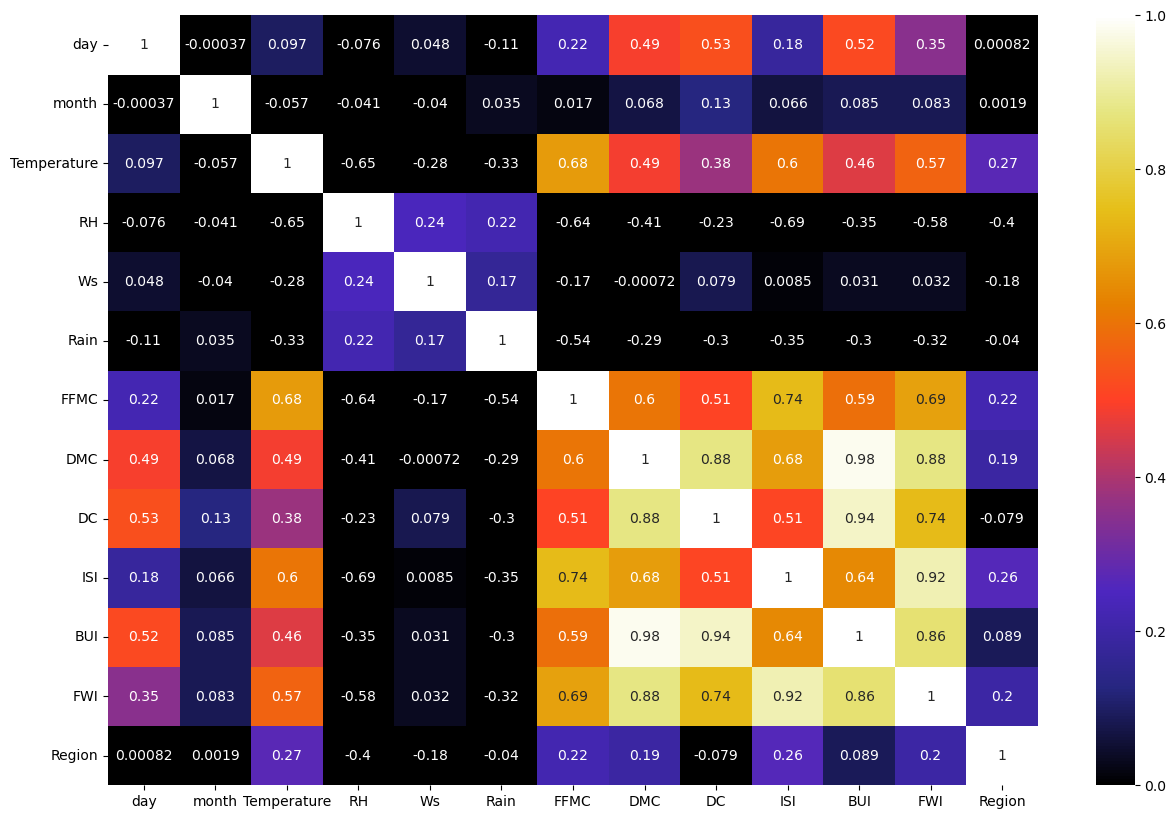

In [17]:
plt.figure(figsize = (15,10))
sns.heatmap(df1.corr(), annot = True, cmap = 'CMRmap',vmin=0, vmax=1);

**Results**
* Highly co related features are DMC and DC with BUI
* Highly co related features are ISI and FWI

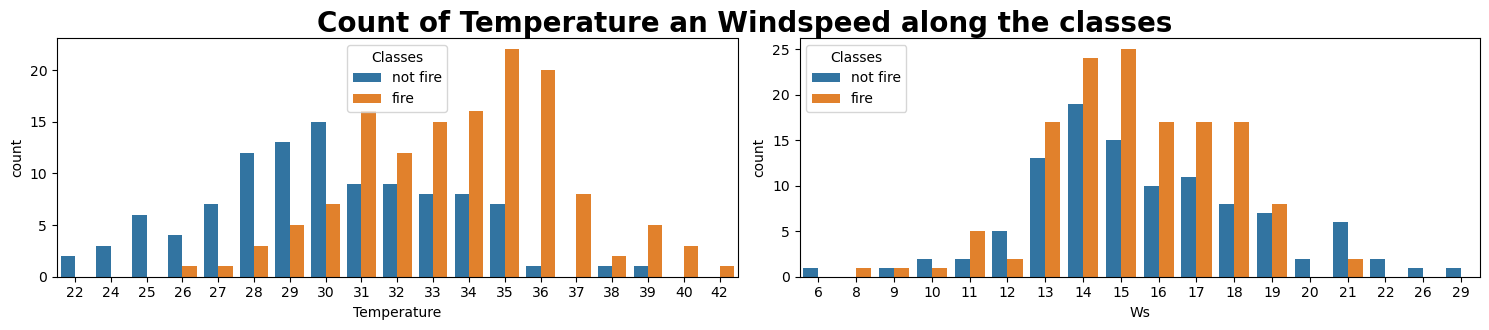

In [65]:
plt.figure(figsize = (15, 15))
plt.suptitle('Count of Temperature an Windspeed along the classes', fontsize = 20, fontweight = 'bold')
col1 = ['Temperature', 'Ws']
for i in range(0, len(col1)):
    plt.subplot(5,2,i+1)
    sns.countplot(x=df1[col1[i]], hue=df1['Classes'])
    plt.xlabel(col1[i])
    plt.tight_layout()

**Result**
* If the temperature is above 39, there is more possibility of fire
* If the wind speed is higher than 22, ther is less possibility of fire 

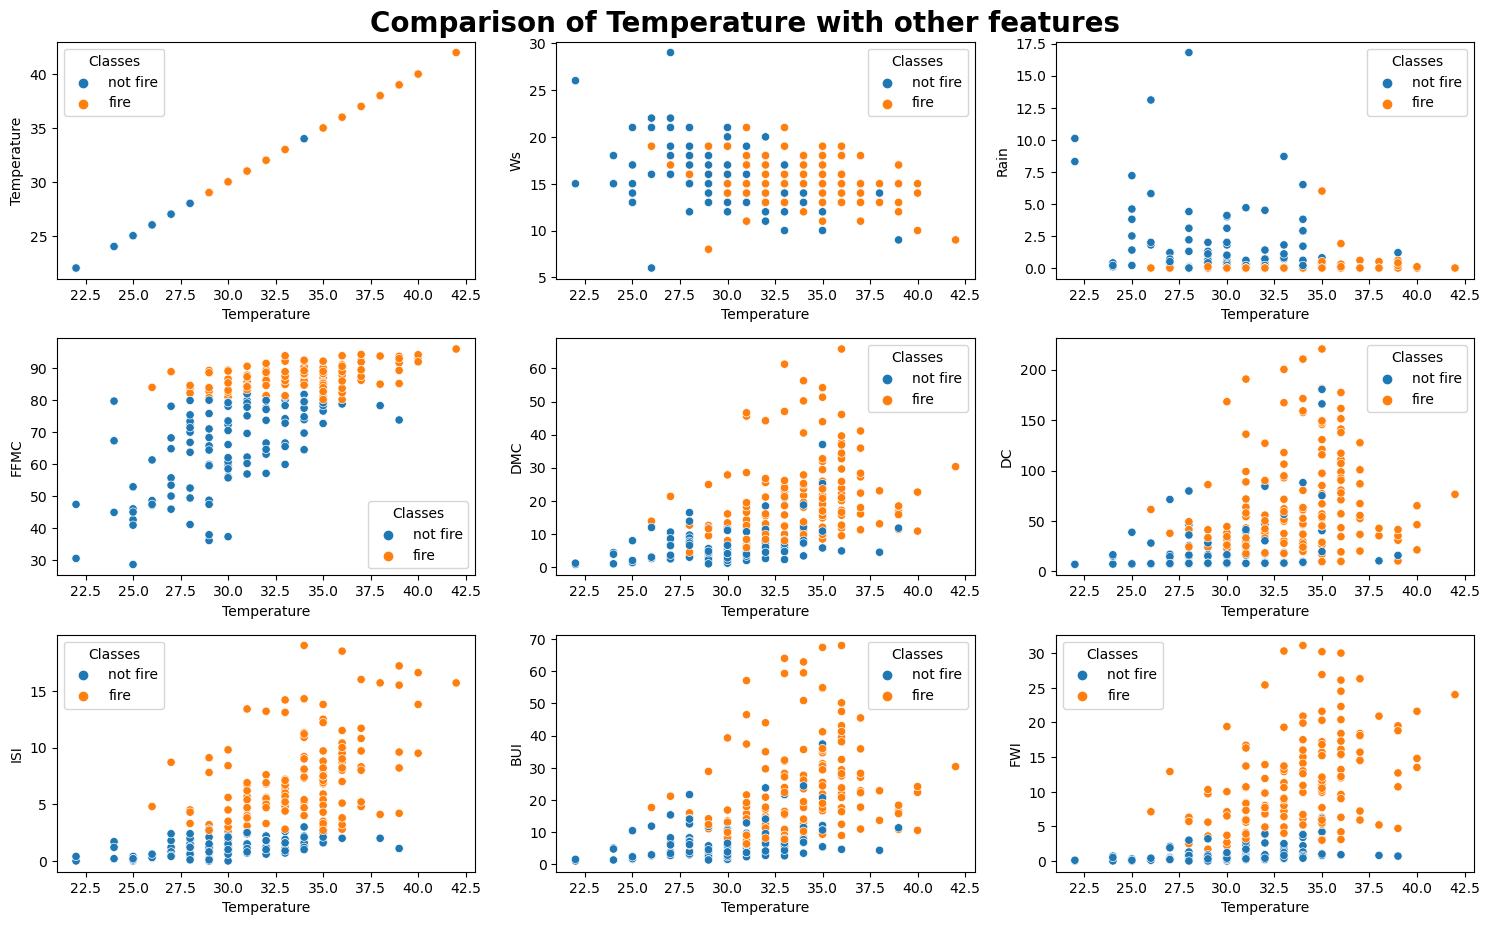

In [69]:
plt.figure(figsize = (15, 15))
plt.suptitle('Comparison of Temperature with other features', fontsize = 20, fontweight = 'bold')
for i in range(0, len(col)):
    plt.subplot(5,3,i+1)
    sns.scatterplot(x = df1['Temperature'], y = df1[col[i]], hue = df1['Classes'])
    plt.ylabel(col[i])
    plt.tight_layout()

**Results**
* There will be no fire at any range of temperature if the FFMC is below 70
* There will be fire at any range of temperature if the ISI is above 4 and FWI is above 5
* There will be no fire at any range of temperature if the rain is above 1.75

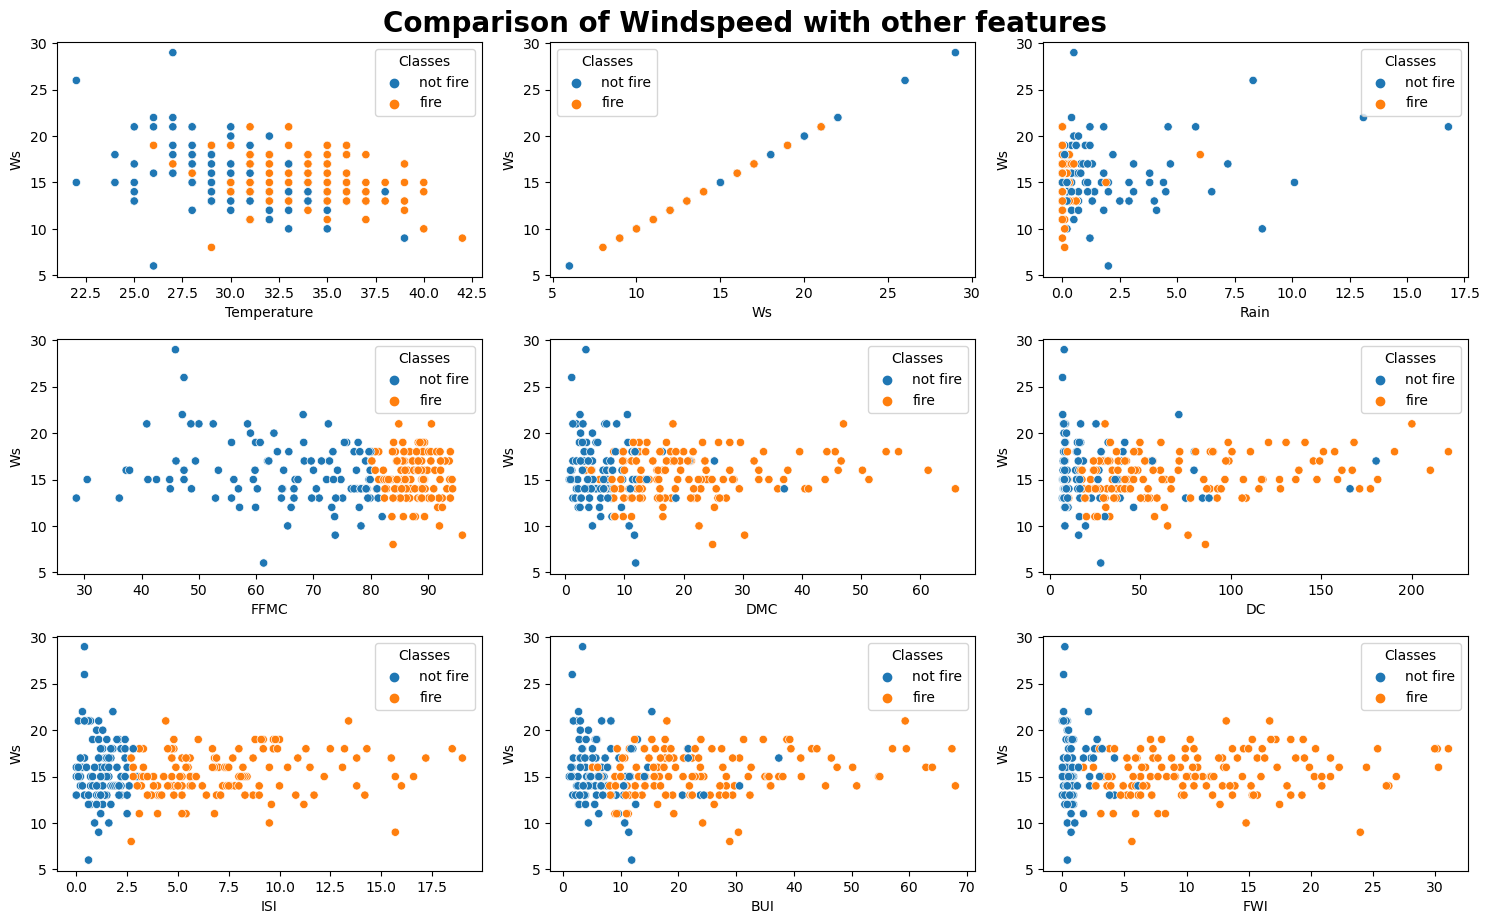

In [72]:
plt.figure(figsize = (15, 15))
plt.suptitle('Comparison of Windspeed with other features', fontsize = 20, fontweight = 'bold')
for i in range(0, len(col)):
    plt.subplot(5,3,i+1)
    sns.scatterplot(y = df1['Ws'], x = df1[col[i]], hue = df1['Classes'])
    plt.xlabel(col[i])
    plt.tight_layout()

## OUTLIERS

In [ ]:
def clip_outliers(df,fea):
    data= df[fea].values
    data.sort()
    Q1,Q3 = np.percentile(df[fea],[25,75])
    IQR = Q3-Q1
    lowerfence = Q1-(1.5*IQR)
    upperfence = Q3+(1.5*IQR)
    df[fea] = df[fea].apply(lambda x:lowerfence if x<lowerfence else x)
    df[fea] = df[fea].apply(lambda x:upperfence if x>upperfence else x)

In [19]:
col = ['Temperature', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
for i in col:
    clip_outliers(df1,i)

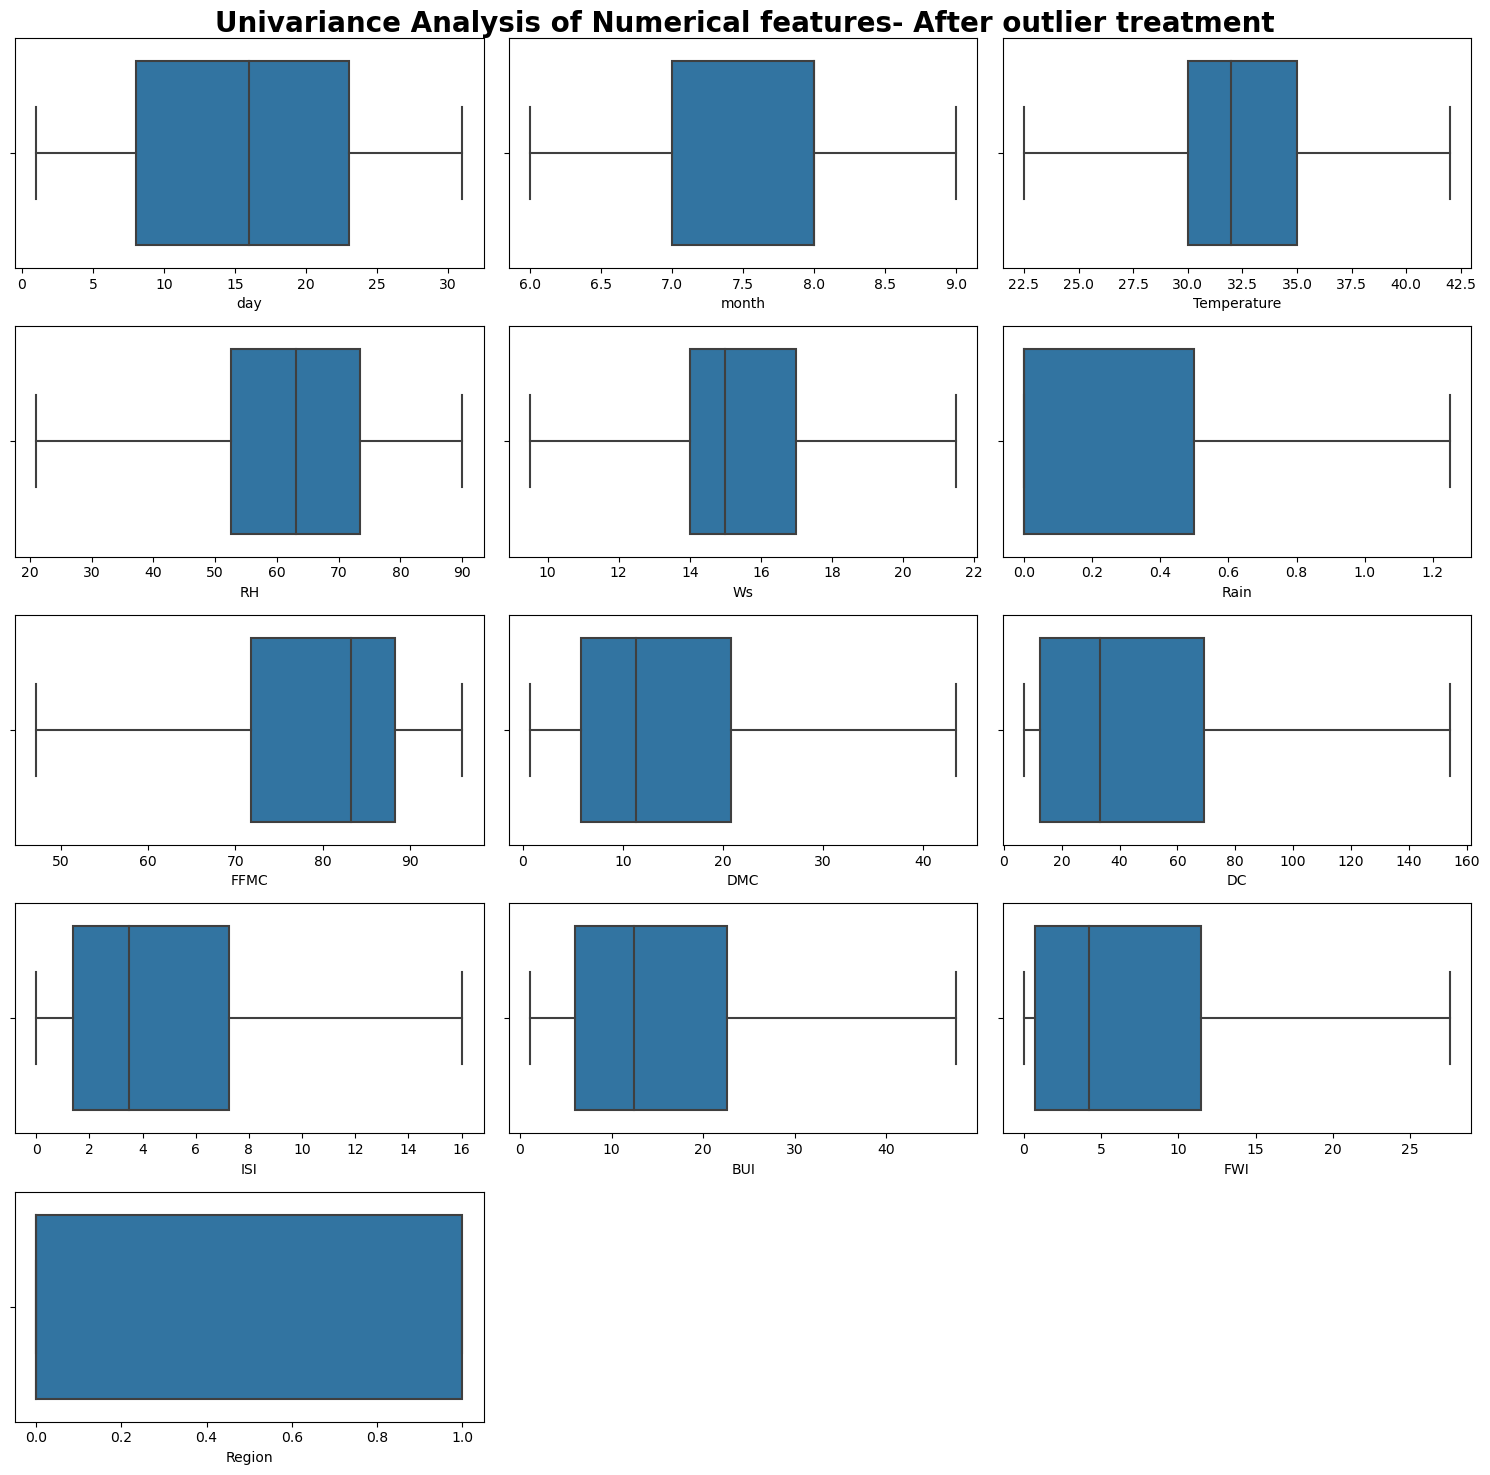

In [20]:
plt.figure(figsize = (15, 15))
plt.suptitle('Univariance Analysis of Numerical features- After outlier treatment', fontsize = 20, fontweight = 'bold')
for i in range(0,len(num_col)):
    plt.subplot(5,3,i+1)
    sns.boxplot(x=df1[num_col[i]])
    plt.xlabel(num_col[i])
    plt.tight_layout()